In [ ]:
!pip install pytorch-transformers
import pandas as pd

train_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/train_d.csv")
validation_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/validation_d.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/test_d.csv")
from pytorch_transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import time

%cd /content/drive/MyDrive/new_exp/chatbot/ARLSTM
from model import LSTMDecoder
from exp import train, test_generation, QandA, get_input

     |████████████████████████████████| 184kB 14.3MB/s 
     |████████████████████████████████| 133kB 29.7MB/s 
     |████████████████████████████████| 890kB 28.7MB/s 
     |████████████████████████████████| 1.2MB 53.7MB/s 
     |████████████████████████████████| 7.3MB 54.3MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=0207626787d91a7fa4a76c9ffa477fda2fa5fbfbcf9c1f29b8f6a0a61fab4dfc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.20.33 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


100%|██████████| 231508/231508 [00:00<00:00, 894056.35B/s]


/content/drive/MyDrive/new_exp/chatbot/ARLSTM


train_loss :  10.326263427734375
validation_loss 10.324752807617188
~~~~
question :  which one? 
gold answer :  any one. i need to sharpen this pencil.
Generated Answer :   troll angela soil punishments punishments villages良 assignedulla inspections ウ emmett daniels international constitution portfoliolandastabha 千 plainsctionlington 170 kaplan function undergo12 squash goblin locomotivessta outstretched cecilbine health affiliate supposedly danzig rye textileア giantsonal caldernov relativity bombardment overlap knows
~~~~
elapsed time :  0.42760443687438965
train_loss :  4.089907169342041
validation_loss 4.2338948249816895
~~~~
question :  i want to be a mail carrier when i grow up. 
gold answer :  why?
Generated Answer :   so
~~~~
elapsed time :  248.5233223438263
train_loss :  3.1693203449249268
validation_loss 3.3026366233825684
~~~~
question :  i think i'll buy both of them. 
gold answer :  you'd better try them on first.
Generated Answer :   it's a good.
~~~~
elapsed time :  497.

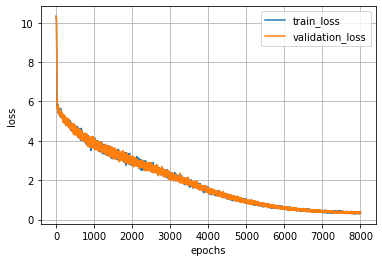

In [ ]:
gpu = True
d_model = 512
layers_num = 2
lr = 0.0001
batch_size = 40
epochs = 8000
show_generate = int(epochs * 0.1)
model = LSTMDecoder(d_model=d_model, layers_num=layers_num)
model = train(model, gpu, lr, batch_size, epochs, train_dataset, validation_dataset, show_generate, layers_num, d_model, tokenizer=tokenizer)

In [ ]:
for i in range(10):
    test_generation(model, test_dataset, i, layers_num, d_model, tokenizer, gpu)

~~~~
question :  i like the one where the fireman tells us why we should vote yes. 
gold answer :  don't believe him! whatever the tv ads tell you, the opposite is true.
Generated Answer :   we'll go in an 10.
~~~~
~~~~
question :  don't believe him! whatever the tv ads tell you, the opposite is true. 
gold answer :  but the title of measure 1 is "better schools at no cost."
Generated Answer :   it's on in california.
~~~~
~~~~
question :  but the title of measure 1 is " better schools at no cost. " 
gold answer :  the title should be "better schools at huge cost."
Generated Answer :   is it it?
~~~~
~~~~
question :  the title should be " better schools at huge cost. " 
gold answer :  i can't believe that they would lie to us.
Generated Answer :   okay, okay. i'll send it one hours.
~~~~
~~~~
question :  i can't believe that they would lie to us. 
gold answer :  of course they liethat's what politicians do!
Generated Answer :   let's go out something?
~~~~
~~~~
question :  i have a st

In [ ]:
QandA(model, "hello?", gpu, True, tokenizer, train_dataset, layers_num, d_model)

Q :  hello?
A :   yes, just care and college it's cold.


" yes, just care and college it's cold."

In [ ]:
def ans(question):
    a = QandA(model, "hello?", gpu, True, tokenizer, train_dataset, layers_num, d_model)

In [ ]:
ans("how are you?")

Q :  hello?
A :   yes, have you, the cat is me.


In [ ]:
def conversation(num, first_question):
    a = QandA(model, first_question, gpu, True, tokenizer, train_dataset, layers_num, d_model)
    for i in range(num):
        if len(a) == 0:
            a = "?"
        a = QandA(model, a, gpu, False, tokenizer, train_dataset, layers_num, d_model)

In [ ]:
conversation(10, "how are you?")

Q :  how are you?
A :   i'm so happy for you.
A :   really?
A :   his nails were black!
A :   that's disgusting.
A :   and he poured water into the glasses.
A :   no,
A :   i was looking on something else.
A :   with
A :   what?
A :   i know.
A :   when did you learn all?


In [ ]:
def first_generation(question, gpu, layers_num=layers_num, d_model=d_model):
    question = torch.LongTensor([tokenizer.convert_tokens_to_ids(question)]).view(1, -1)
    if gpu:
        question = question.cuda()
    _, sep, cls, _, h, c = get_input(train_dataset, 0, gpu, layers_num, d_model, generate=True)
    return model.generate(question, h, c, sep, cls)

In [ ]:
first_generation("how are you", gpu)

'[UNK] about 90 of veterans.'